Mackenzie Butler, 12-4-24, Final Project Preliminary Draft
I got this survey Data from Marjolein Yvonne Schippers' Masters Thesis: "Live Music Concert Attendees 
Motivation, Satisfaction & Loyalyt  where she did a survey of 140 about concert attendanc. https://thesis.eur.nl/pub/32748/Schippers-Marjolein.pdf  

I am very passonate about music so I wanted to some analyzing of why people go to concerts and what motivaes them and their different demographics

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy import stats
import statsmodels.formula.api as smf
import numpy as np

In [2]:
cas = pd.read_csv('Concert_Demo.csv')
cas2 = pd.read_csv('Concert_Motives.csv')
cas3 = pd.read_csv('Concert_Factors.csv')
cas4 = pd.read_csv('Concert_Expierence.csv')

cas.head()

,Column1,Sex,Age,Travel Time,Attendance Frequency,visit BIRD,Know BIRD
0,1,57.0,4.0,52.0,24.0,96,46.0
1,2,83.0,40.0,48.0,27.0,51,76.0
2,3,NaN,45.0,27.0,70.0,65,10.0
3,4,NaN,23.0,13.0,14.0,50,16.0
4,5,NaN,28.0,NaN,5.0,55,7.0


The table above is data complied from a survey of 140 participants. This one was asking about their motives for going to concerts as well as some preliminary demographics. For the Sex column, 1 = male and 2 = female. 

For age:  < 20 (1), 20-25 (2), 26-35 (3), 36-45 (4) , 46-59 (5), 60+ (6)

For time traveled:  Less than 15 minutes (1), 15-30 minutes (2), Up to 1 hour (3), More than 1 hour (4)

For attendance frequency: Less than Once a Year (1), Once a Year (2), 2-4 Times a Year (3), Once a Month (4), 2-3 Times a Month (5), More than 3 times a Month (6)

For visit BIRD, which is why they visit and they were allowed to pick more than 1 box, (BIRD being the venue visited):
Specific show (1), Variety of shows (2), Location (3), Reputation of BIRD (4), Small venue (5), Friendly staff(6), Value for money (7), Good access facilities (8), Other (9)

For know BIRD, which is how they heard about BIRD and where allowed to pick more than 1 box:
Website (1), Social media (2), Adds newspaper (3), Poster (4), Flyer (5), Friends/family (6), Other (7)

 ther (9)h (6) 4)  (6) 

In [3]:
cas2.head()

,Column1,Emotional,Knowledge,Escape,Another World,Socialize,Distinguish,Entertained,Original Expierence,Physical Skill,Physical Attractiveness,Physical Proximity,Uninhibited Behavior,Relive Past,Overall Satisfaction,Recommend,Return
0,1,4.0,11.0,8.0,4.0,4.0,64.0,1.0,3.0,10.0,73.0,35.0,54.0,37.0,0,1,1
1,2,10.0,30.0,10.0,12.0,21.0,18.0,2.0,11.0,13.0,21.0,31.0,25.0,29.0,0,0,1
2,3,27.0,58.0,35.0,34.0,24.0,42.0,5.0,33.0,32.0,26.0,43.0,41.0,41.0,0,1,0
3,4,67.0,38.0,66.0,67.0,68.0,12.0,45.0,65.0,67.0,15.0,28.0,25.0,26.0,0,0,1
4,5,32.0,3.0,21.0,23.0,23.0,3.0,87.0,28.0,18.0,3.0,3.0,4.0,6.0,1,1,5


The table above was a survey about what the peoples motives for going to concerts on a scale of 1-5, 1 being a low motive and 5 being a high motive. they could only choose on number for each question

In [4]:
cas3.head()

,Column1,Ticket Buying F,Venue Appearance F,Availablility Parking F,Accessibility Parking F,Wardrobe F,Sound Quality F,Lighnting F,Friendliness Staff F,Bar Service F
0,1,1,1,60,3,14,1,2,2,2
1,2,12,4,12,16,15,1,10,2,2
2,3,23,17,25,38,48,3,18,17,22
3,4,72,72,29,63,52,40,82,64,63
4,5,32,46,12,20,13,95,28,55,51


The survey above was asking what people beeived were important factors about a venue when attending a concert, with 1 being least important and 5 being most important. They could only pick one number per question. I put the Fs in the naming to stand for factor to differenciate which data set I am pulling from

In [5]:
cas4.head()

,Column1,Easy Ticket Buying,Venue Appearance,Availablility Parking,Accessibility Parking,Wardrobe,Sound Quality,Lightning,Friendliness Staff,Bar Service
0,1,35,44,13,24,10,15,14,33,22
1,2,81,76,50,89,51,91,79,69,75
2,3,23,17,62,26,56,27,36,26,28
3,4,1,3,14,1,21,7,11,11,11
4,5,0,0,1,0,2,0,0,1,4


The table above was asking about thier expierence at the venue this survey was originated from, BIRD. It was asking thier thoughts, 1 being poor and 5 being exellent. Each participant could only choose one number per question.

There are a lot of things that I want to compare and analyze

in no particular order things like travel time and location of BIRD. If they were enertained and how often they come back. I could compare every factor they say is important when attending a concert to how they ranked the same factors to the venue BIRD. The age and relive past. whether they are there to see a specific show or just socialize.

Below is comparing The Travel time and location. blue is travel timad and purple is location. With location I tried to only graph only the poeple that answered 3 in the visit BIRD category.

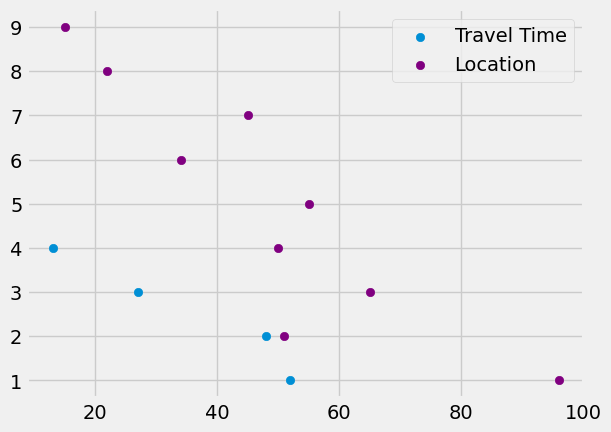

In [130]:
fig1, ax1 = plt.subplots()
a_scatter1=ax1.scatter(cas['Travel Time'], cas['Column1'], label = 'Travel Time')
b_scatter1=ax1.scatter(cas['visit BIRD'], cas['Column1'], label = 'Location',color='purple')
plt.legend(handles = [a_scatter1, b_scatter1])
plt.style.use('fivethirtyeight')
plt.show()

this graph shows most participants have a low travel time and around 65 people chose location as a reason to visit bird. For location we only care about the people that answered 3 because thats the location perameter in visit BIRD but I dont know how to single it out.

For time traveled: Less than 15 minutes (1), 15-30 minutes (2), Up to 1 hour (3), More than 1 hour (4)


this plot below showing how entertained people were (blue) and comparing to if they would return (purple)

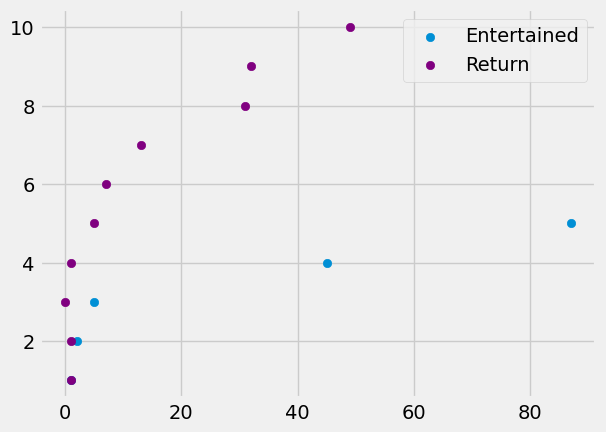

In [90]:
fig2, ax2 = plt.subplots()
a_scatter2=ax2.scatter(cas2['Entertained'], cas2['Column1'], label = 'Entertained')
b_scatter2=ax2.scatter(cas2['Return'], cas2['Column1'], label = 'Return',color='purple')
plt.legend(handles = [a_scatter2, b_scatter2])
plt.show()

This graph shows us that in purple people that said they would return, where 1 is least likely to return and 10 is most likey that most people have a higher return value and that relates to the entertained value, where 1 is least entertainedand 5 is most entertained. They both correlate because the majority of responses are on the highest value.

Below is a graph to comapare how old poeple are (Blue) and how much their motivation to Relive the past is (Orange)

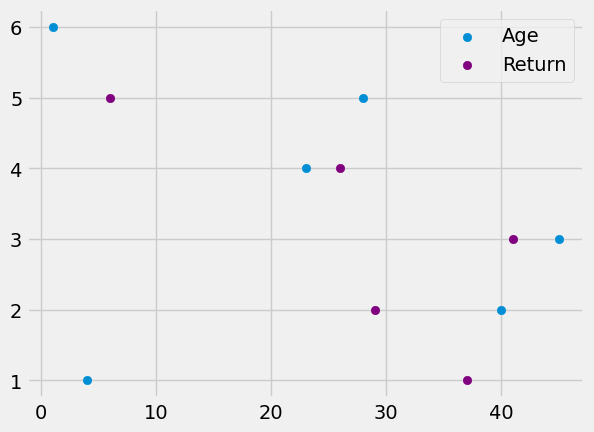

In [89]:
fig3, ax3 = plt.subplots()
a_scatter3=ax3.scatter(cas['Age'], cas['Column1'], label = 'Age')
b_scatter3=ax3.scatter(cas2['Relive Past'], cas2['Column1'], label = 'Return',color='purple')
plt.legend(handles = [a_scatter3, b_scatter3])
plt.show()

The age here varys but the most participants said 3 which means they are between the ages of 26-35. Participants where asked their reasons for going to show and relive past where 1 is least motivation and 5 is the most motivation. 3 was the most picked which is a middle pick which lines up with the people in the middle ages

Below is comparing how many poeple visit bird for a specific show(Blue) or to socialize(Orange)

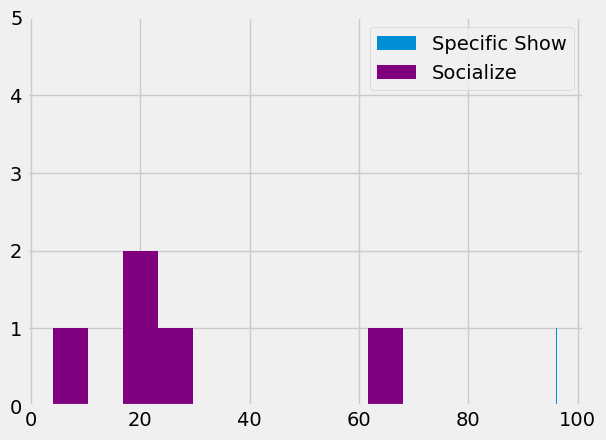

In [136]:
fig4, ax4 = plt.subplots()
ax4.hist(cas['visit BIRD'].iloc[0], label = ('Specific Show'))
ax4.hist(cas2['Socialize'],label = ('Socialize'),color='purple')
ax4.legend( ncols=1)
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

In this graph shows that around 96 people would visit bird to see a specific show. I dont know what is wrong with the socialize category because it should be showing y values 1-5, i guess it only works in a scatter plot where I can specifiy the y value.

The next ones I am just going to do a couple of the sections that comapre what the participant deemed as important when visiting a venue and their thoughts on BIRD (cas3 and cas4) I will do the rest in the final report

Below is whether they though easy ticket buying was important (blue) and how easy they though BIRD's ticket buying was (Purple)

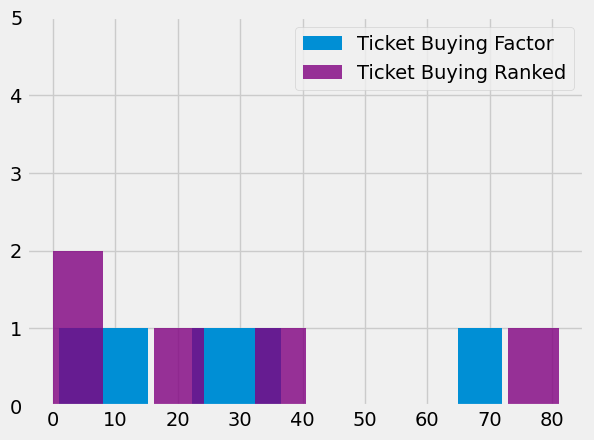

In [137]:
fig6, ax6 = plt.subplots()
ax6.hist(cas3['Ticket Buying F'], label = ('Ticket Buying Factor'))
ax6.hist(cas4['Easy Ticket Buying'], label = ('Ticket Buying Ranked'),color='purple', alpha = .8)
plt.yticks([0, 1, 2, 3, 4,5])
ax6.legend( ncols=1)
plt.show()

Again this bar chart should have bars reach 1-5 for both y values. So i think it can only work as a scatter plot. I wont explain the future bar graphs because they are not accurate. I will probably delete all of them in the final project

Same comparision but in a scatter plot

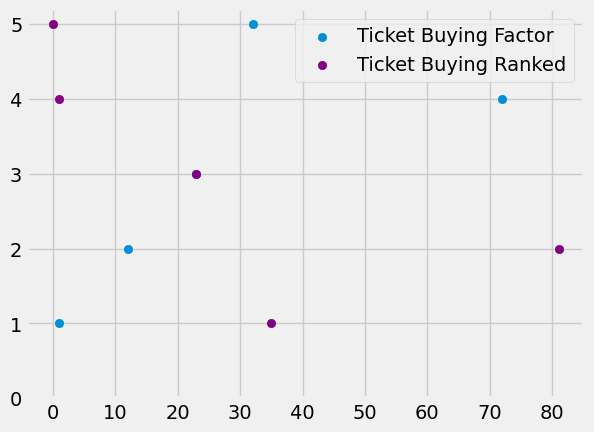

In [138]:
fig7, ax7 = plt.subplots()
a_scatter7=ax7.scatter(cas3['Ticket Buying F'], cas3['Column1'],label = ('Ticket Buying Factor'))
b_scatter7=ax7.scatter(cas4['Easy Ticket Buying'],cas4['Column1'], label = ('Ticket Buying Ranked'),color='purple')
plt.legend(handles = [a_scatter7, b_scatter7])
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

participants chose factors 1-5 for how important something was when attending a concert where 1 is least important and 5 is most important. most people, around a little more than 70 chose 4. They were also asked how BIRD's, which is the venue douing the survey, ticket buying satisfaction was where 1 is lowest and 5 is highest. Most poeple, around a little more than 80, said it was 3 which is about average.

<function matplotlib.pyplot.show(close=None, block=None)>

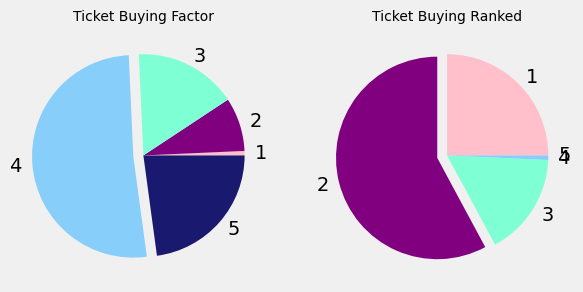

In [33]:
fig13, ax13 = plt.subplots(1,2)
ax13[0].pie(cas3['Ticket Buying F'],labels = cas3['Column1'],explode = (0, 0, 0,.1,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax13[1].pie(cas4['Easy Ticket Buying'],labels = cas4['Column1'],explode = (0, .1, 0,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax13[0].set_title('Ticket Buying Factor', size=10)
ax13[1].set_title('Ticket Buying Ranked',size=10)

plt.show

This shows the majority of what poeple chose, visualized better, comapring peoples important factor to BIRD's

The figure below compares how important Venue appearance is (Blue) and how they ranked BIRD's Venue appearance (purple)

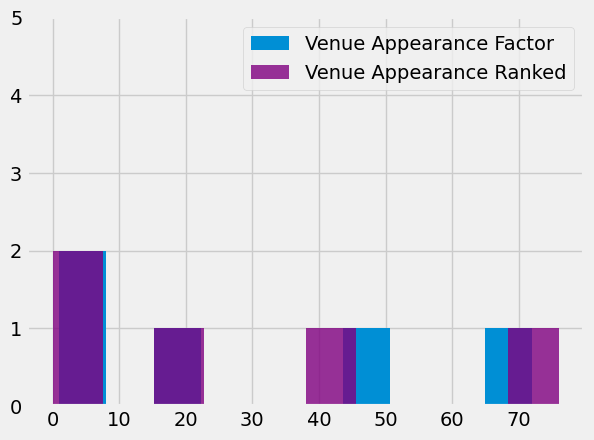

In [140]:
fig8, ax8 = plt.subplots()
ax8.hist(cas3['Venue Appearance F'], label = ('Venue Appearance Factor'))
ax8.hist(cas4['Venue Appearance'], label = ('Venue Appearance Ranked'),color='purple', alpha = .8)
ax8.legend( ncols=1)
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

Same comparison but scatter plot

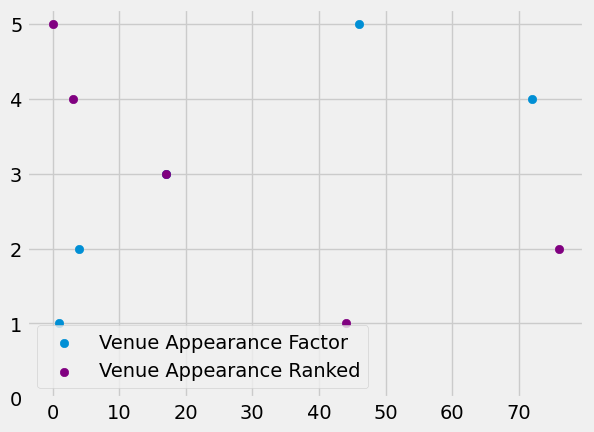

In [141]:
fig9, ax9 = plt.subplots()
a_scatter9=ax9.scatter(cas3['Venue Appearance F'], cas3['Column1'],label = ('Venue Appearance Factor'))
b_scatter9=ax9.scatter(cas4['Venue Appearance'],cas4['Column1'], label = ('Venue Appearance Ranked'),color='purple')
plt.legend(handles = [a_scatter9, b_scatter9])
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

participants chose how important venue appearance is when going to a concert where 1 is low importance and 5 is high. Most poeple, around 75, said 2. They then ranked BIRD's venue appearance 1 being worst and 5 being the best. Most people, a little more than 70, ranked 4.

<function matplotlib.pyplot.show(close=None, block=None)>

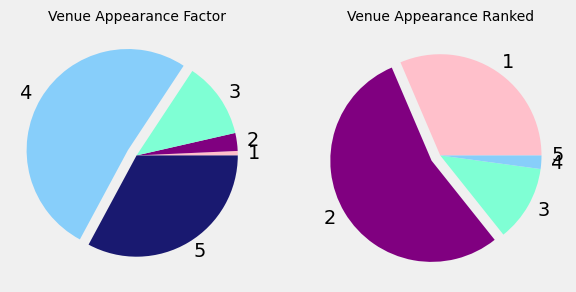

In [34]:
fig14, ax14 = plt.subplots(1,2)
ax14[0].pie(cas3['Venue Appearance F'],labels = cas3['Column1'],explode = (0, 0, 0,.1,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax14[1].pie(cas4['Venue Appearance'],labels = cas4['Column1'],explode = (0, .1, 0,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax14[0].set_title('Venue Appearance Factor', size=10)
ax14[1].set_title('Venue Appearance Ranked',size=10)

plt.show

This shows the majority of what poeple chose, visualized better, comapring peoples important factor to BIRD's

Comparing how important people thought Availablility Parking is to a venue (Blue) and how they ranked BIRD's Availablility Parking (purple)

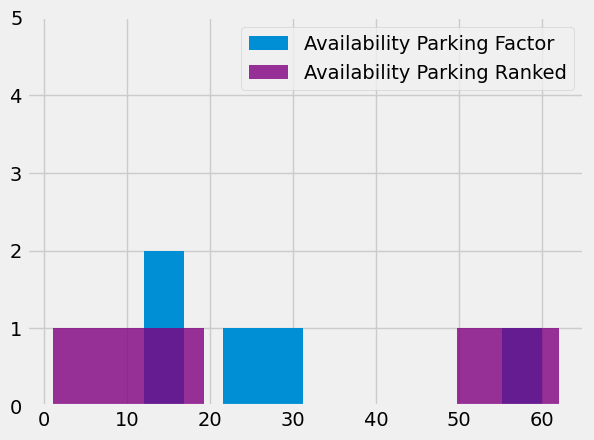

In [142]:
fig10, ax10 = plt.subplots()
ax10.hist(cas3['Availablility Parking F'], label = ('Availability Parking Factor'))
ax10.hist(cas4['Availablility Parking'], label = ('Availability Parking Ranked'),color='purple', alpha = .8)
ax10.legend( ncols=1)
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

Same comparison but a scatter plot

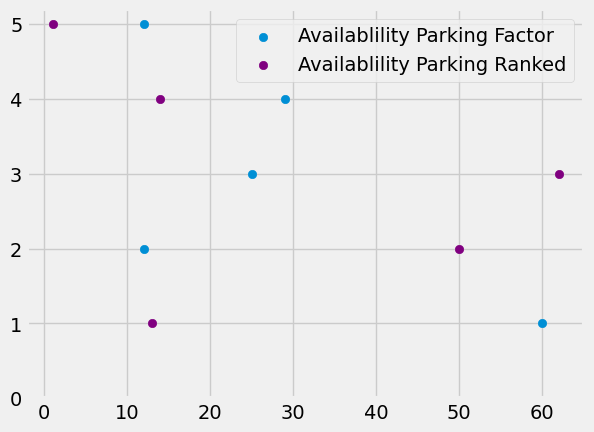

In [143]:
fig11, ax11 = plt.subplots()
a_scatter11=ax11.scatter(cas3['Availablility Parking F'], cas3['Column1'],label = ('Availablility Parking Factor'))
b_scatter11=ax11.scatter(cas4['Availablility Parking'],cas4['Column1'], label = ('Availablility Parking Ranked'),color='purple')
plt.legend(handles = [a_scatter11, b_scatter11])
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

Participants were asked on a scale of 1-5, 1 being the least and 5 the most, how importanr avaialabilty parking is when attending a concert. Most people, around 60, said it was a 1. They then ranked BIRD's availability parking on a scale of 1-5 with 1 being bad and 5 being the best. Majority, a little more than 60, chose 3

<function matplotlib.pyplot.show(close=None, block=None)>

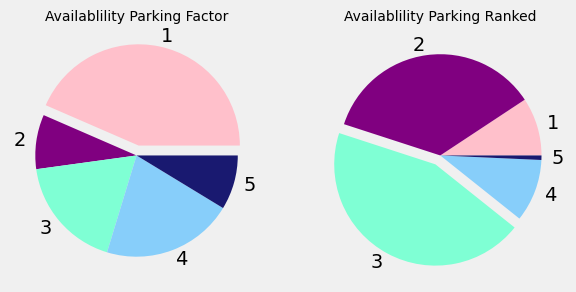

In [31]:
fig12, ax12 = plt.subplots(1,2)
ax12[0].pie(cas3['Availablility Parking F'],labels = cas3['Column1'],explode = (.1, 0, 0,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax12[1].pie(cas4['Availablility Parking'],labels = cas4['Column1'],explode = (0, 0, .1,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax12[0].set_title('Availablility Parking Factor', size=10)
ax12[1].set_title('Availablility Parking Ranked',size=10)

plt.show

This shows the majority of what poeple chose, visualized better, comapring peoples important factor to BIRD's

Below I will make a bar graph, scatter plot, and pie charts comparing Accessability parking factor (blue) and BIRD's Accessability parking ranked (purple)

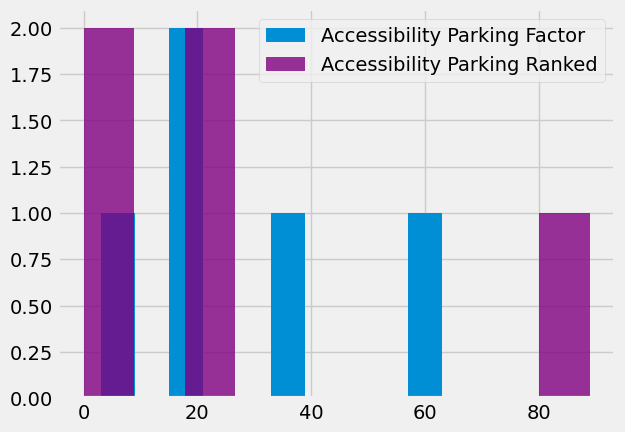

In [104]:
fig14, ax14 = plt.subplots()
ax14.hist(cas3['Accessibility Parking F'], label = ('Accessibility Parking Factor'))
ax14.hist(cas4['Accessibility Parking'], label = ('Accessibility Parking Ranked'),color='purple', alpha = .8)
ax14.legend( ncols=1)
plt.show()

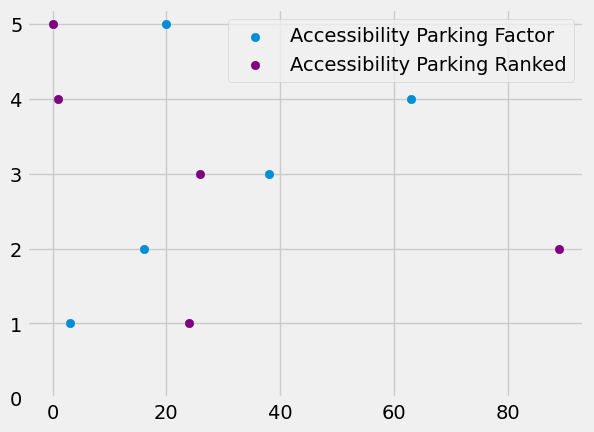

In [144]:
fig15, ax15 = plt.subplots()
a_scatter15=ax15.scatter(cas3['Accessibility Parking F'], cas3['Column1'],label = ('Accessibility Parking Factor'))
b_scatter15=ax15.scatter(cas4['Accessibility Parking'],cas4['Column1'], label = ('Accessibility Parking Ranked'),color='purple')
plt.legend(handles = [a_scatter15, b_scatter15])
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

Participants were asked on a scale of 1-5, 1 being the least and 5 the most, how important Accessibility parking is when attending a concert. Most people, a little more than 60, said it was a 4. They then ranked BIRD's accessablility parking on a scale of 1-5 with 1 being bad and 5 being the best. Majority, a little less than 90, chose 2.

<function matplotlib.pyplot.show(close=None, block=None)>

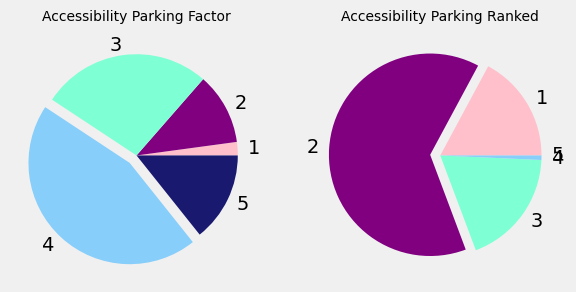

In [45]:
fig16, ax16 = plt.subplots(1,2)
ax16[0].pie(cas3['Accessibility Parking F'],labels = cas3['Column1'],explode = (0, 0, 0,.1,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax16[1].pie(cas4['Accessibility Parking'],labels = cas4['Column1'],explode = (0, .1, 0,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax16[0].set_title('Accessibility Parking Factor', size=10)
ax16[1].set_title('Accessibility Parking Ranked',size=10)

plt.show

This shows the majority of what poeple chose, visualized better, comapring peoples important factor to BIRD's

Below I will make a bar graph, scatter plot, and pie charts comparing the Wardrobe factor (blue) and BIRD's wardrobe ranked (purple)

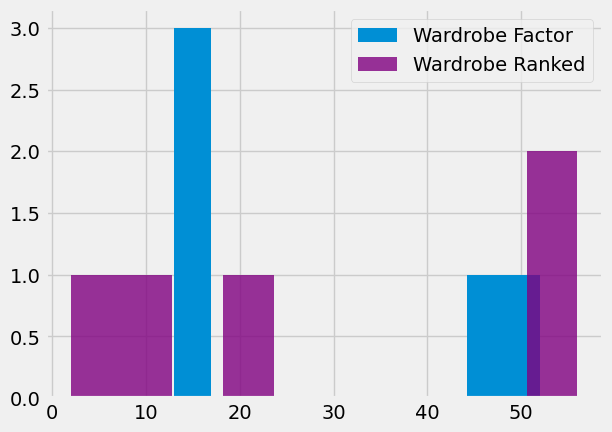

In [103]:
fig17, ax17 = plt.subplots()
ax17.hist(cas3['Wardrobe F'], label = ('Wardrobe Factor'))
ax17.hist(cas4['Wardrobe'], label = ('Wardrobe Ranked'),color='purple', alpha = .8)
ax17.legend( ncols=1)

plt.show()

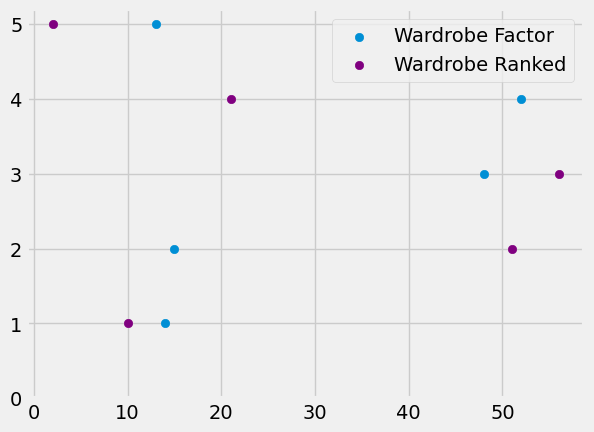

In [145]:
fig18, ax18 = plt.subplots()
a_scatter18=ax18.scatter(cas3['Wardrobe F'], cas3['Column1'],label = ('Wardrobe Factor'))
b_scatter18=ax18.scatter(cas4['Wardrobe'],cas4['Column1'], label = ('Wardrobe Ranked'), color='purple')
plt.legend(handles = [a_scatter18, b_scatter18])
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

Participants were asked on a scale of 1-5, 1 being the least and 5 the most, how important wardrobe factor is when attending a concert. Most people, a little more than 50, said it was a 4 as well as a little less than 50 said it was a 3. They then ranked BIRD's wardrobe factor on a scale of 1-5 with 1 being bad and 5 being the best. Most, a little less than 60, chose 3 as well as a little more tham 50 said 2. 

<function matplotlib.pyplot.show(close=None, block=None)>

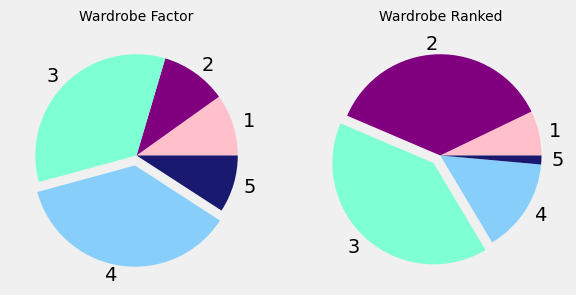

In [48]:
fig19, ax19 = plt.subplots(1,2)
ax19[0].pie(cas3['Wardrobe F'],labels = cas3['Column1'],explode = (0, 0, 0,.1,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax19[1].pie(cas4['Wardrobe'],labels = cas4['Column1'],explode = (0, 0, .1,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax19[0].set_title('Wardrobe Factor', size=10)
ax19[1].set_title('Wardrobe Ranked',size=10)

plt.show

This shows the majority of what poeple chose, visualized better, comapring peoples important factor to BIRD's

Below I will make a bar graph, scatter plot, and pie charts comparing the Sound Quality factor (blue) and BIRD's Sound Quality ranked (purple)

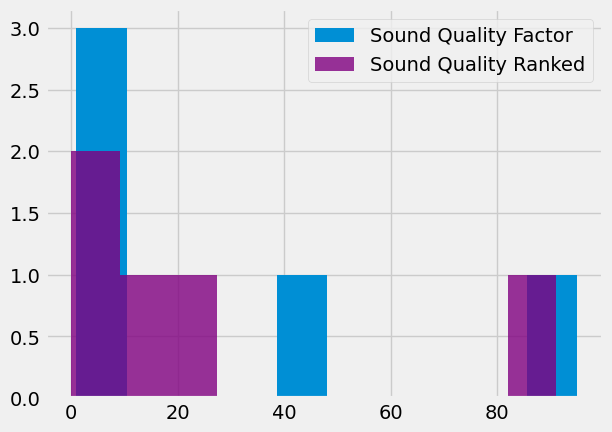

In [102]:
fig20, ax20 = plt.subplots()
ax20.hist(cas3['Sound Quality F'], label = ('Sound Quality Factor'))
ax20.hist(cas4['Sound Quality'], label = ('Sound Quality Ranked'),color='purple', alpha = .8)
ax20.legend( ncols=1)

plt.show()

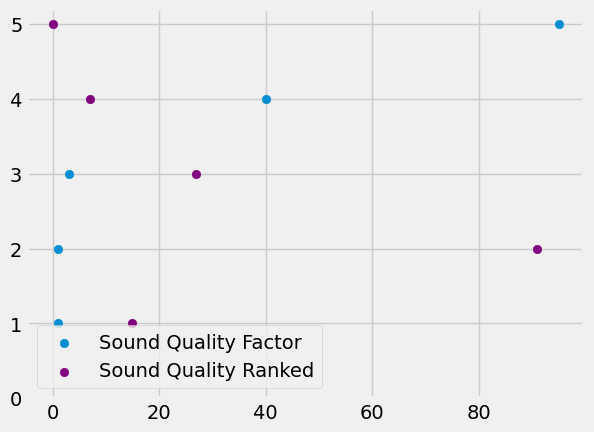

In [146]:
fig21, ax21 = plt.subplots()
a_scatter21=ax21.scatter(cas3['Sound Quality F'], cas3['Column1'],label = ('Sound Quality Factor'))
b_scatter21=ax21.scatter(cas4['Sound Quality'],cas4['Column1'], label = ('Sound Quality Ranked'), color='purple')
plt.legend(handles = [a_scatter21, b_scatter21])
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

Participants were asked on a scale of 1-5, 1 being the least and 5 the most, how important the sound quality factor is when attending a concert. Most people, a little less than 90, said it was a 5. They then ranked BIRD's sound quality on a scale of 1-5 with 1 being bad and 5 being the best. Most, more than 80, ranked BIRD as a 2. the other ranks have a lot less people.

<function matplotlib.pyplot.show(close=None, block=None)>

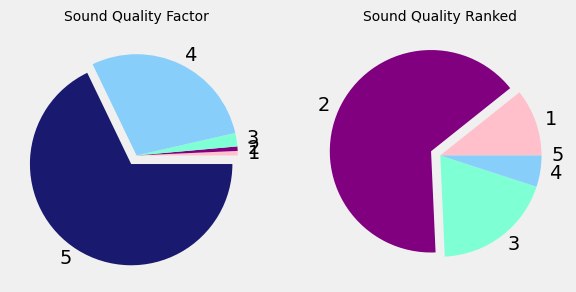

In [114]:
fig22, ax22 = plt.subplots(1,2)
ax22[0].pie(cas3['Sound Quality F'],labels = cas3['Column1'],explode = (0, 0, 0,0,.1), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax22[1].pie(cas4['Sound Quality'],labels = cas4['Column1'],explode = (0, .1, 0,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax22[0].set_title('Sound Quality Factor', size=10)
ax22[1].set_title('Sound Quality Ranked',size=10)

plt.show

This shows the majority of what poeple chose, visualized better, comapring peoples important factor to BIRD's

Below I will make a bar graph, scatter plot, and pie charts comparing the Lightning factor (blue) and BIRD's Lightning ranked (purple)

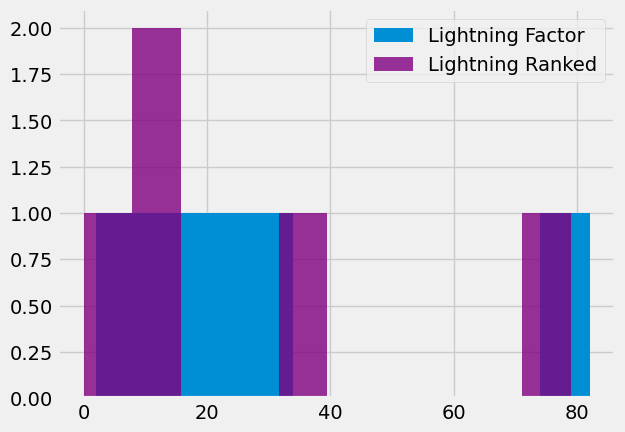

In [116]:
fig23, ax23 = plt.subplots()
ax23.hist(cas3['Lighnting F'], label = ('Lightning Factor'))
ax23.hist(cas4['Lightning'], label = ('Lightning Ranked'),color='purple', alpha = .8)
ax23.legend( ncols=1)

plt.show()

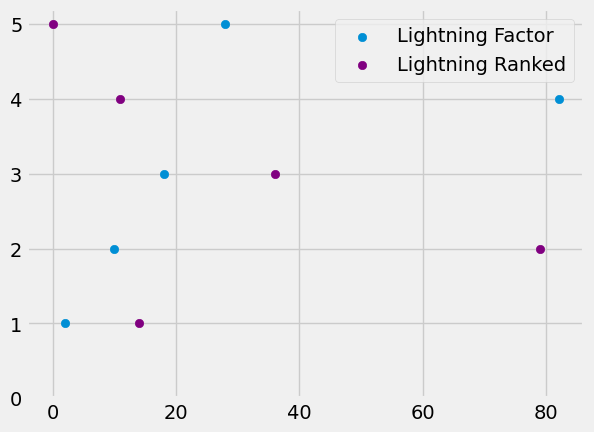

In [147]:
fig23, ax23 = plt.subplots()
a_scatter23=ax23.scatter(cas3['Lighnting F'], cas3['Column1'],label = ('Lightning Factor'))
b_scatter23=ax23.scatter(cas4['Lightning'],cas4['Column1'], label = ('Lightning Ranked'), color='purple')
plt.legend(handles = [a_scatter23, b_scatter23])
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

Participants were asked on a scale of 1-5, 1 being the least and 5 the most, how important the Lightning factor is when attending a concert. Most people, a little more than 80, said it was a 4. They then ranked BIRD's lightning on a scale of 1-5 with 1 being bad and 5 being the best. Most, a little less than 80, ranked BIRD as a 2.

<function matplotlib.pyplot.show(close=None, block=None)>

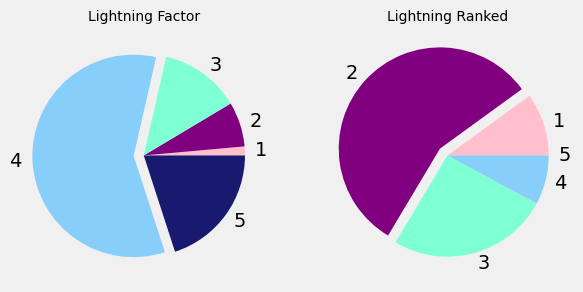

In [120]:
fig24, ax24 = plt.subplots(1,2)
ax24[0].pie(cas3['Lighnting F'],labels = cas3['Column1'],explode = (0, 0, 0,.1,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax24[1].pie(cas4['Lightning'],labels = cas4['Column1'],explode = (0, .1, 0,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax24[0].set_title('Lightning Factor', size=10)
ax24[1].set_title('Lightning Ranked',size=10)

plt.show

This shows the majority of what poeple chose, visualized better, comapring peoples important factor to BIRD's

Below I will make a bar graph, scatter plot, and pie charts comparing the Friendliness Staff factor (blue) and BIRD's Friendliness Staff ranked (purple)

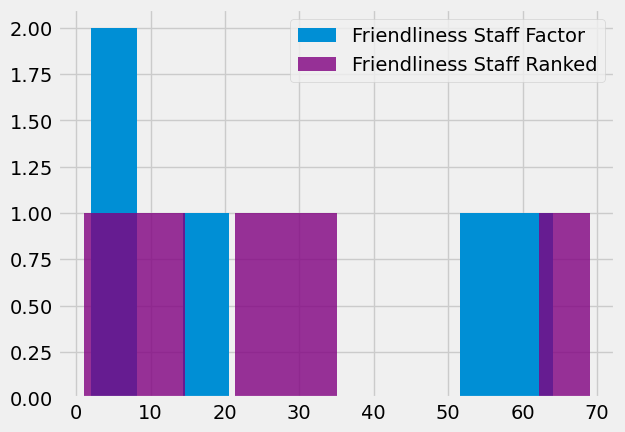

In [121]:
fig25, ax25 = plt.subplots()
ax25.hist(cas3['Friendliness Staff F'], label = ('Friendliness Staff Factor'))
ax25.hist(cas4['Friendliness Staff'], label = ('Friendliness Staff Ranked'),color='purple', alpha = .8)
ax25.legend( ncols=1)

plt.show()

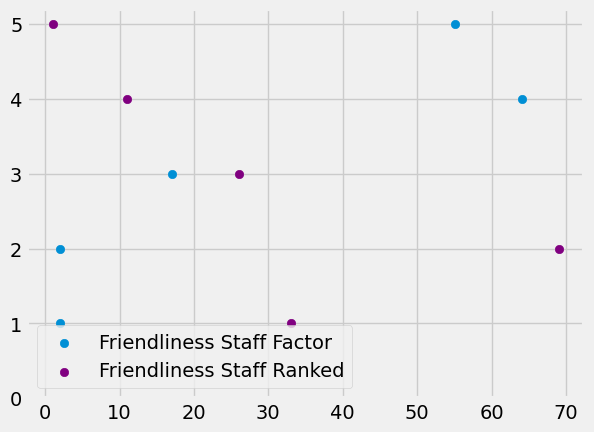

In [148]:
fig26, ax26 = plt.subplots()
a_scatter26=ax26.scatter(cas3['Friendliness Staff F'], cas3['Column1'],label = ('Friendliness Staff Factor'))
b_scatter26=ax26.scatter(cas4['Friendliness Staff'],cas4['Column1'], label = ('Friendliness Staff Ranked'), color='purple')
plt.legend(handles = [a_scatter26, b_scatter26])
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

Participants were asked on a scale of 1-5, 1 being the least and 5 the most, how important the friendliness of staff factor is when attending a concert. Most people, a little more than 60, said it was a 4. They then ranked BIRD's staff friendliness on a scale of 1-5 with 1 being bad and 5 being the best. Most, a little less than 70, ranked BIRD as a 2.

<function matplotlib.pyplot.show(close=None, block=None)>

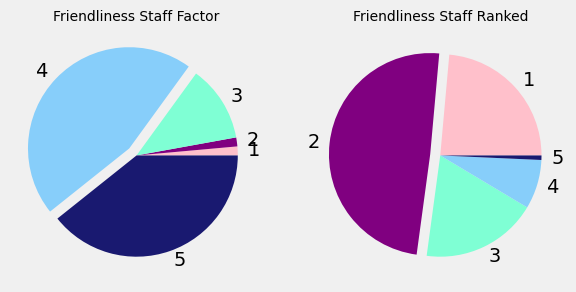

In [124]:
fig27, ax27 = plt.subplots(1,2)
ax27[0].pie(cas3['Friendliness Staff F'],labels = cas3['Column1'],explode = (0, 0, 0,.1,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax27[1].pie(cas4['Friendliness Staff'],labels = cas4['Column1'],explode = (0, .1, 0,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax27[0].set_title('Friendliness Staff Factor', size=10)
ax27[1].set_title('Friendliness Staff Ranked',size=10)

plt.show

This shows the majority of what poeple chose, visualized better, comapring peoples important factor to BIRD's

Below I will make a bar graph, scatter plot, and pie charts comparing the Bar Service factor (blue) and BIRD's Bar Service ranked (purple)

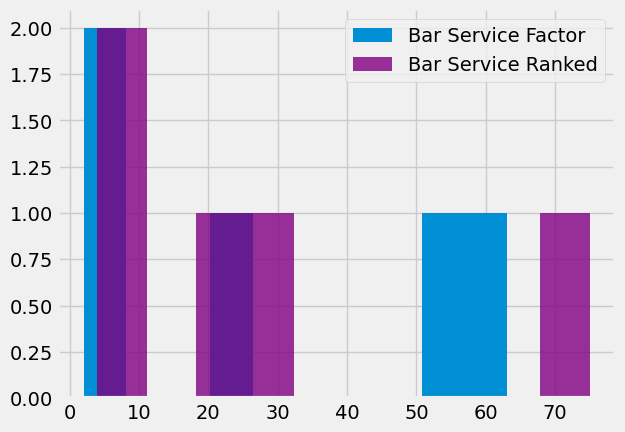

In [126]:
fig28, ax28 = plt.subplots()
ax28.hist(cas3['Bar Service F'], label = ('Bar Service Factor'))
ax28.hist(cas4['Bar Service'], label = ('Bar Service Ranked'),color='purple', alpha = .8)
ax28.legend( ncols=1)

plt.show()

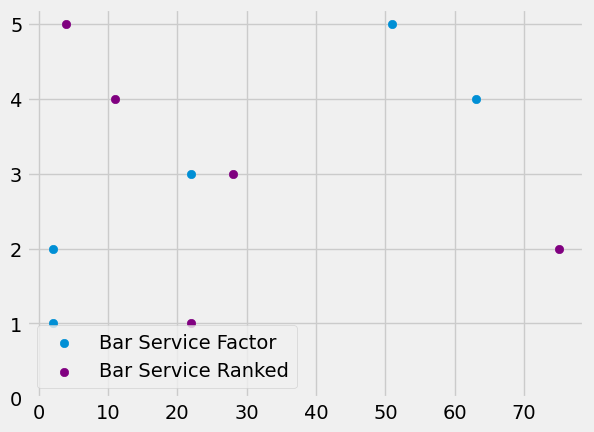

In [149]:
fig29, ax29 = plt.subplots()
a_scatter29=ax29.scatter(cas3['Bar Service F'], cas3['Column1'],label = ('Bar Service Factor'))
b_scatter29=ax29.scatter(cas4['Bar Service'],cas4['Column1'], label = ('Bar Service Ranked'), color='purple')
plt.legend(handles = [a_scatter29, b_scatter29])
plt.yticks([0, 1, 2, 3, 4,5])
plt.show()

Participants were asked on a scale of 1-5, 1 being the least and 5 the most, how important the bar service factor is when attending a concert. Most people, a little more than 60, said it was a 4. They then ranked BIRD's bar service on a scale of 1-5 with 1 being bad and 5 being the best. Most, more than 70, ranked BIRD as a 2.

<function matplotlib.pyplot.show(close=None, block=None)>

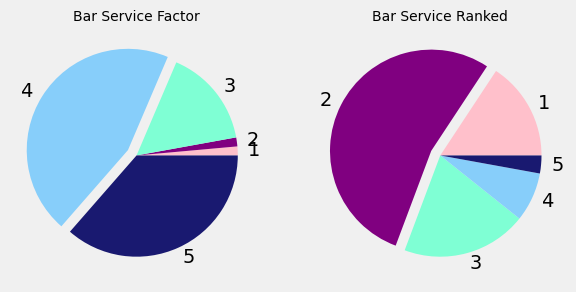

In [128]:
fig30, ax30 = plt.subplots(1,2)
ax30[0].pie(cas3['Bar Service F'],labels = cas3['Column1'],explode = (0, 0, 0,.1,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax30[1].pie(cas4['Bar Service'],labels = cas4['Column1'],explode = (0, .1, 0,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax30[0].set_title('Bar Service Factor', size=10)
ax30[1].set_title('Bar Service Ranked',size=10)

plt.show

This shows the majority of what poeple chose, visualized better, comapring peoples important factor to BIRD's

when comparing people's important factors to how they ranked BIRD, BIRD is almost less than what they deem as important. to see if this effects if they would return I will put a pie chart of the results to see if these factors effect them returning as well as how likley they are to reccomend BIRD to others and their overall satisfaction. They were asked 1-10 how likely they were about these things where 1 is least likely/least satisfied and 10 is most likely/most satisfied

<function matplotlib.pyplot.show(close=None, block=None)>

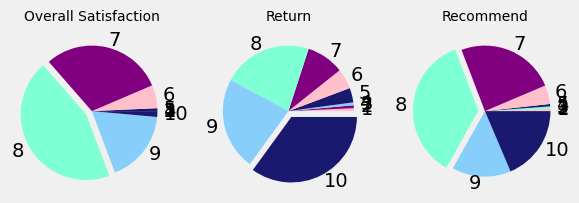

In [162]:
fig31, ax31 = plt.subplots(1,3)
ax31[0].pie(cas2['Overall Satisfaction'],labels = cas2['Column1'],explode = (0, 0, 0,0,0,0,0,.1,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax31[1].pie(cas2['Return'],labels = cas2['Column1'],explode = (0, 0, 0,0,0,0,0,0,0,.1), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax31[2].pie(cas2['Recommend'],labels = cas2['Column1'],explode = (0, 0, 0,0,0,0,0,.1,0,0), 
       colors = ['pink', 'purple', 'aquamarine','lightskyblue','midnightblue'])
ax31[0].set_title('Overall Satisfaction', size=10)
ax31[1].set_title('Return',size=10)
ax31[2].set_title('Recommend',size=10)

plt.show

Most poeple seem to be highly satisfied and likely to return and recommend BIRD regardless of the factors they deemed as important when going to a concert. I wish I knew how to make it so that the graph wouldn't plot any answers that =0.